<a href="https://colab.research.google.com/github/vindinudecosta/Mobile-Based-Crop-Leaf-Disease-Detection-System-Using-Deep-Learning/blob/main/Tea_disease_classification_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
from zipfile import ZipFile
with ZipFile('/content/gdrive/MyDrive/tea_leaf_diseases.zip','r') as zipObj:
     zipObj.extractall('Tea Leaf Disease Images')

In [3]:
!pip install split-folders[full]

In [4]:
import splitfolders
input_folder = '/content/Tea Leaf Disease Images/tea sickness dataset'
splitfolders.ratio(input_folder,output ="teadataset",
                   seed = 42,ratio=(0.7,0.1,0.2),
                   group_prefix=None)

Copying files: 885 files [00:02, 301.15 files/s]


In [5]:
import tensorflow as tf
from keras import models, layers
import matplotlib.pyplot as plt

from keras.preprocessing.image import ImageDataGenerator

In [10]:
IMAGE_SIZE = 256
BATCH_SIZE = 8
CHANNELS = 3
EPOCHS =20

In [6]:
dataset = tf.keras.preprocessing.image_dataset_from_directory("/content/Tea Leaf Disease Images/tea sickness dataset")

Found 885 files belonging to 8 classes.


In [7]:
class_names = dataset.class_names
class_names

['Anthracnose',
 'algal leaf',
 'bird eye spot',
 'brown blight',
 'gray light',
 'healthy',
 'red leaf spot',
 'white spot']

In [11]:
train_datagen = ImageDataGenerator(

                 rescale = 1./255,
                 horizontal_flip= True,
                 rotation_range =10

)

train_generator = train_datagen.flow_from_directory('/content/teadataset/train',

                                                    target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                                    batch_size= BATCH_SIZE,
                                                    class_mode='sparse',

                                                    )

Found 618 images belonging to 8 classes.


In [12]:
validation_datagen = ImageDataGenerator(

                 rescale = 1./255,
                 horizontal_flip= True,
                 rotation_range =10

)

validation_generator = validation_datagen.flow_from_directory('/content/teadataset/val',

                                                    target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                                    batch_size= BATCH_SIZE,
                                                    class_mode='sparse',

                                                    )

Found 87 images belonging to 8 classes.


In [13]:
test_datagen = ImageDataGenerator(

                 rescale = 1./255,
                 horizontal_flip= True,
                 rotation_range =10

)

test_generator = test_datagen.flow_from_directory('/content/teadataset/test',

                                                    target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                                    batch_size=BATCH_SIZE,
                                                    class_mode='sparse',

                                                    )

Found 180 images belonging to 8 classes.


In [14]:
input_shape=(IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes =8
base_model = tf.keras.applications.MobileNetV2(
    input_shape = input_shape,
    include_top=False,
    weights='imagenet',

)

for layer in base_model.layers:
    layer.trainable = False
#x = layers.Flatten()(x)
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(16, activation='relu')(x)
x = layers.Dense(32, activation='relu')(x)
x = layers.Dense(32, activation='relu')(x)


outputs = layers.Dense(n_classes, activation='softmax')(x)

model = tf.keras.Model(inputs=base_model.input, outputs=outputs)

In [15]:
model.compile(
  optimizer = 'adam',
  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits =False),
  metrics = ['accuracy']

)

In [16]:
history = model.fit(

    train_generator,
    steps_per_epoch= 77, ## train data set / batch size
    batch_size =8,
    validation_data= validation_generator,
    validation_steps =11,## validation data set/ batch size
    verbose=1,
    epochs =20
)

Epoch 1/20
77/77 [==============================] - 47s 516ms/step - loss: 1.7307 - accuracy: 0.3557 - val_loss: 1.4278 - val_accuracy: 0.4138
Epoch 2/20
77/77 [==============================] - 38s 498ms/step - loss: 1.1214 - accuracy: 0.5574 - val_loss: 0.9632 - val_accuracy: 0.5747
Epoch 3/20
77/77 [==============================] - 36s 469ms/step - loss: 0.7927 - accuracy: 0.6934 - val_loss: 0.8483 - val_accuracy: 0.6092
Epoch 4/20
77/77 [==============================] - 38s 493ms/step - loss: 0.6104 - accuracy: 0.7689 - val_loss: 0.8118 - val_accuracy: 0.6207
Epoch 5/20
77/77 [==============================] - 37s 484ms/step - loss: 0.5226 - accuracy: 0.8115 - val_loss: 0.6982 - val_accuracy: 0.7126
Epoch 6/20
77/77 [==============================] - 40s 518ms/step - loss: 0.4234 - accuracy: 0.8377 - val_loss: 0.9674 - val_accuracy: 0.6782
Epoch 7/20
77/77 [==============================] - 42s 543ms/step - loss: 0.3672 - accuracy: 0.8738 - val_loss: 0.6997 - val_accuracy: 0.7356

In [17]:
scores = model.evaluate(test_generator,verbose=0)
scores

[0.9087761640548706, 0.7888888716697693]

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Loss')

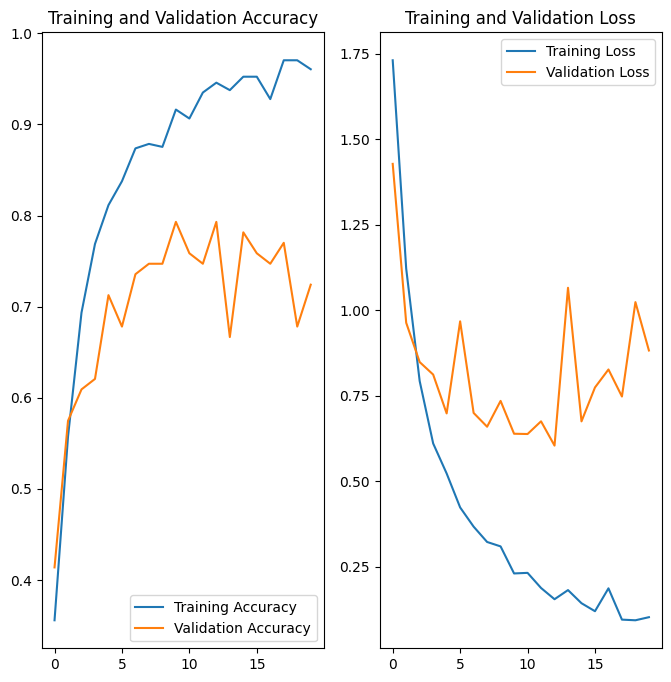

In [19]:
plt.figure(figsize =(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label = 'Training Accuracy')
plt.plot(range(EPOCHS),val_acc,label = 'Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label = 'Training Loss')
plt.plot(range(EPOCHS),val_loss,label = 'Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

first image to predict
actual label:  red leaf spot
1/1 [==============================] - 1s 1s/step
Predicted label:  red leaf spot


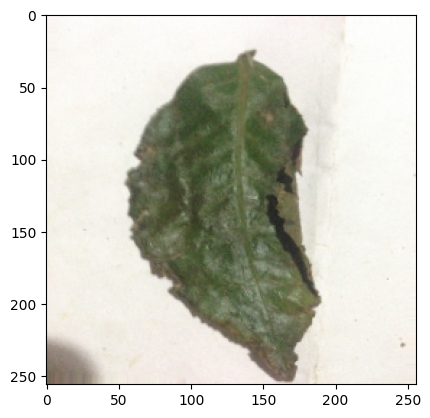

In [20]:
import numpy as np

for images_batch, labels_batch in test_generator:
  first_image = images_batch[0]
  first_label = int (labels_batch[0])

  print("first image to predict")
  plt.imshow(first_image)
  print("actual label: ", class_names[first_label])


  batch_prediction = model.predict(images_batch)
  print("Predicted label: ",class_names[np.argmax(batch_prediction[0])])
  break

In [21]:
def predict(model, img):
  img_array = tf.keras.preprocessing.image.img_to_array(images[i])
  img_array = tf.expand_dims(img_array,0)

  predictions = model.predict(img_array)

  predicted_class = class_names[np.argmax(predictions[0])]
  confidence = round(100* (np.max(predictions[0])),2)

  return predicted_class, confidence

1/1 [==============================] - 0s 26ms/step


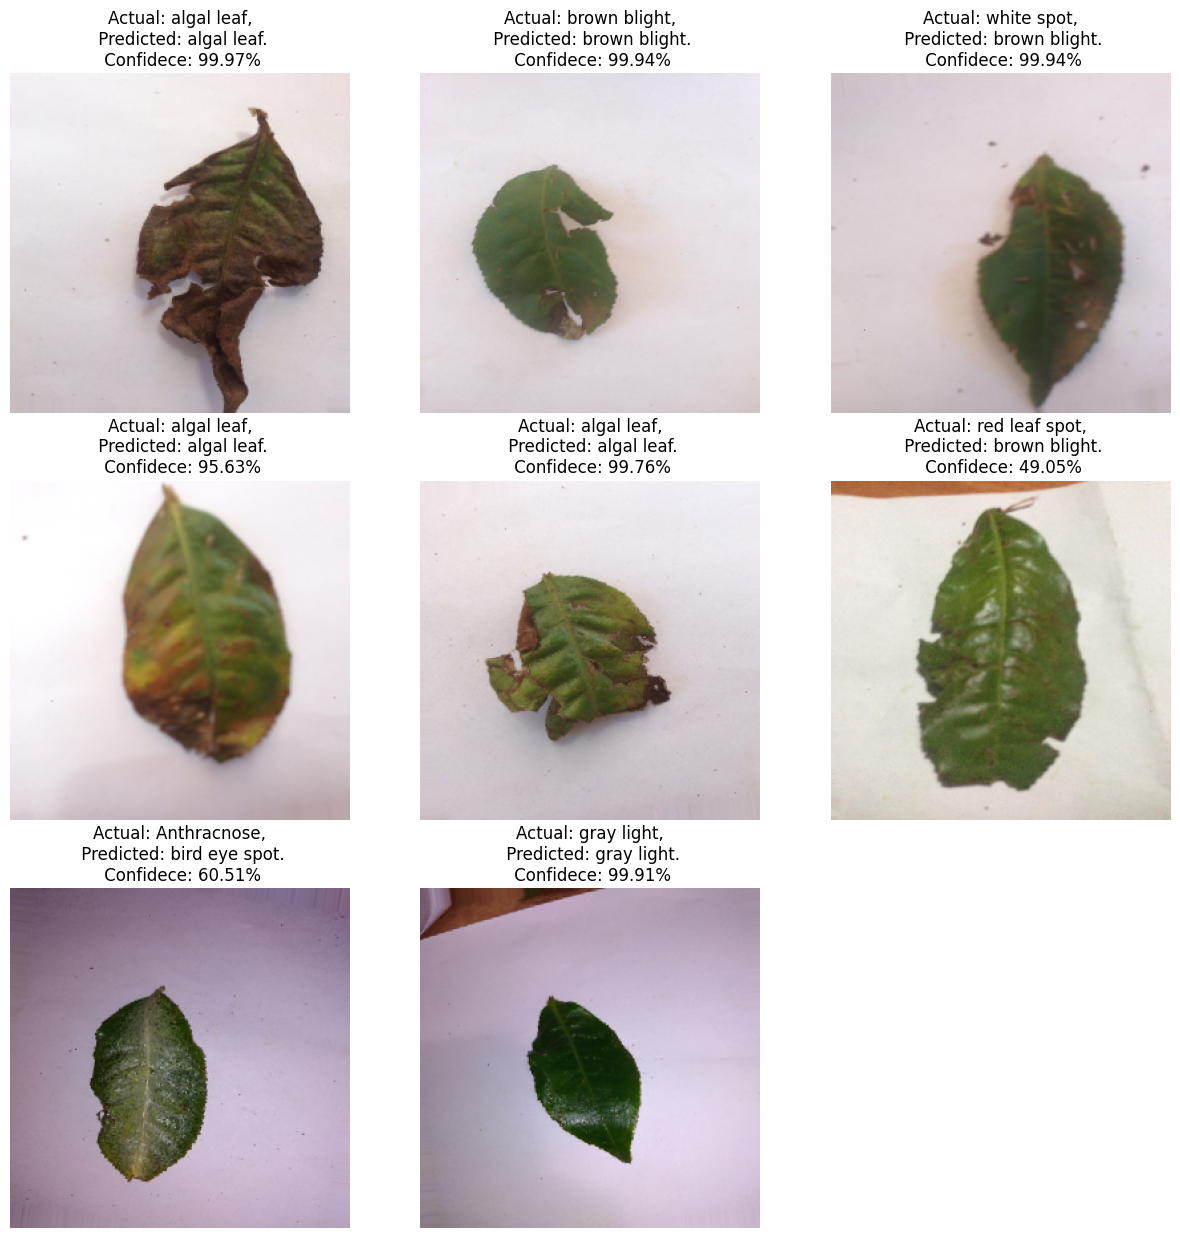

In [22]:
plt.figure(figsize = (15,15))
for images, labels in test_generator:

  for i in range(8):

    ax = plt.subplot(3,3,i+1)
    plt.imshow(images[i])

    predicted_class, confidence = predict(model, images[i])
    actual_class = class_names[int(labels[i])]

    plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidece: {confidence}%")

    plt.axis("off")
  break

In [23]:
model.save("/content/gdrive/MyDrive/tealeaves_disease_classification_models/trained_model_tealeaves_v1.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [24]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quant_model = converter.convert()

In [25]:
with open('/content/gdrive/MyDrive/tealeaves_disease_classification_models/trained_model_tealeaves_v1.tflite', 'wb') as f:
   f.write(tflite_quant_model)

In [26]:
import numpy
test_images = []
test_labels = []
for i in range(len(test_generator)):
    batch_images, batch_labels = test_generator[i]
    test_images.extend(batch_images)
    test_labels.extend(batch_labels)

# Convert the lists to numpy arrays
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [27]:
def evaluate(interpreter):
  prediction= []
  input_index = interpreter.get_input_details()[0]["index"]
  output_index = interpreter.get_output_details()[0]["index"]
  input_format = interpreter.get_output_details()[0]['dtype']

  for i, test_image in enumerate(test_images):
    if i % 100 == 0:
      print('Evaluated on {n} results so far.'.format(n=i))
    test_image = np.expand_dims(test_image, axis=0).astype(input_format)
    interpreter.set_tensor(input_index, test_image)

    # Run inference.
    interpreter.invoke()
    output = interpreter.tensor(output_index)
    predicted_label = np.argmax(output()[0])
    prediction.append(predicted_label)

  print('\n')
  # Comparing prediction results with ground truth labels to calculate accuracy.
  prediction = np.array(prediction)
  accuracy = (prediction == test_labels).mean()
  return accuracy

In [28]:
# Passing the Integer Quantized TF Lite model to the Interpreter.
interpreter = tf.lite.Interpreter('/content/gdrive/MyDrive/tealeaves_disease_classification_models/trained_model_tealeaves_v1.tflite')
# Allocating tensors.
interpreter.allocate_tensors()
# Evaluating the model on the test images.
test_accuracy = evaluate(interpreter)
print('Quantized TFLite Model Test Accuracy:', test_accuracy*100)
print('Baseline Keras Model Test Accuracy:', scores*100)

Evaluated on 0 results so far.
Evaluated on 100 results so far.


Quantized TFLite Model Test Accuracy: 79.44444444444444
Baseline Keras Model Test Accuracy: [0.9087761640548706, 0.7888888716697693, 0.9087761640548706, 0.7888888716697693, 0.9087761640548706, 0.7888888716697693, 0.9087761640548706, 0.7888888716697693, 0.9087761640548706, 0.7888888716697693, 0.9087761640548706, 0.7888888716697693, 0.9087761640548706, 0.7888888716697693, 0.9087761640548706, 0.7888888716697693, 0.9087761640548706, 0.7888888716697693, 0.9087761640548706, 0.7888888716697693, 0.9087761640548706, 0.7888888716697693, 0.9087761640548706, 0.7888888716697693, 0.9087761640548706, 0.7888888716697693, 0.9087761640548706, 0.7888888716697693, 0.9087761640548706, 0.7888888716697693, 0.9087761640548706, 0.7888888716697693, 0.9087761640548706, 0.7888888716697693, 0.9087761640548706, 0.7888888716697693, 0.9087761640548706, 0.7888888716697693, 0.9087761640548706, 0.7888888716697693, 0.9087761640548706, 0.7888888716697693, 0